# Background
PetMind is a retailer of products for pets. They are based in the United States.
PetMind sells products that are a mix of luxury items and everyday items. Luxury items include
toys. Everyday items include food.
The company wants to increase sales by selling more everyday products repeatedly.
They have been testing this approach for the last year.
They now want a report on how repeat purchases impact sales.

## Data Vaidation

In [30]:
import pandas as pd
pd.set_option("display.max_columns", None)
df=pd.read_csv('pets_new.csv')
# Set proct_id as the index
df['repeat_purchase'] = df['repeat_purchase'].astype("category")
print(df.info())
df.set_index('product_id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   product_id       1500 non-null   int64   
 1   category         1500 non-null   object  
 2   animal           1500 non-null   object  
 3   size             1500 non-null   object  
 4   price            1500 non-null   float64 
 5   sales            1500 non-null   float64 
 6   rating           1500 non-null   int64   
 7   repeat_purchase  1500 non-null   category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 83.7+ KB
None


,category,animal,size,price,sales,rating,repeat_purchase
product_id,,,,,,,
1,Food,Bird,large,51.10,1860.62,7,1
2,Housing,Bird,MEDIUM,35.98,963.60,6,0
3,Food,Dog,medium,31.23,898.30,5,1
4,Medicine,Cat,small,24.95,982.15,6,1
5,Housing,Cat,Small,26.18,832.63,7,1
...,...,...,...,...,...,...,...
1496,Food,Bird,medium,40.91,1203.36,5,0
1497,Equipment,Dog,small,32.89,1099.97,5,0
1498,Food,Fish,Small,25.79,724.02,3,0


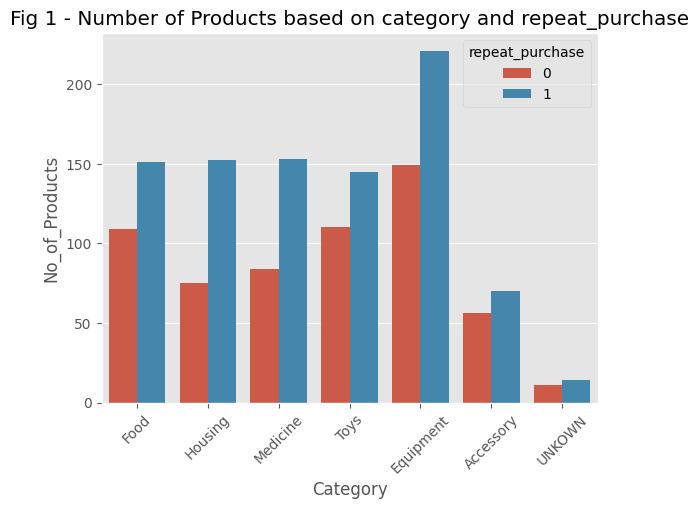

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
df=pd.read_csv('pets_new.csv')
g = sns.countplot(x='category',
              hue='repeat_purchase',
           data=df)
g.set_title('Fig 1 - Number of Products based on category and repeat_purchase')
g.set(xlabel='Category', ylabel='No_of_Products')
plt.xticks(rotation=45)
plt.show()

      product_id   category animal  ...    sales  rating  repeat_purchase
0              1       Food   Bird  ...  1860.62       7                1
1              2    Housing   Bird  ...   963.60       6                0
2              3       Food    Dog  ...   898.30       5                1
3              4   Medicine    Cat  ...   982.15       6                1
4              5    Housing    Cat  ...   832.63       7                1
...          ...        ...    ...  ...      ...     ...              ...
1495        1496       Food   Bird  ...  1203.36       5                0
1496        1497  Equipment    Dog  ...  1099.97       5                0
1497        1498       Food   Fish  ...   724.02       3                0
1498        1499   Medicine   Fish  ...   658.66       5                1
1499        1500       Food    Cat  ...   826.08       4                1

[1500 rows x 8 columns]
      product_id   category animal  ...    sales  rating  repeat_purchase
0            

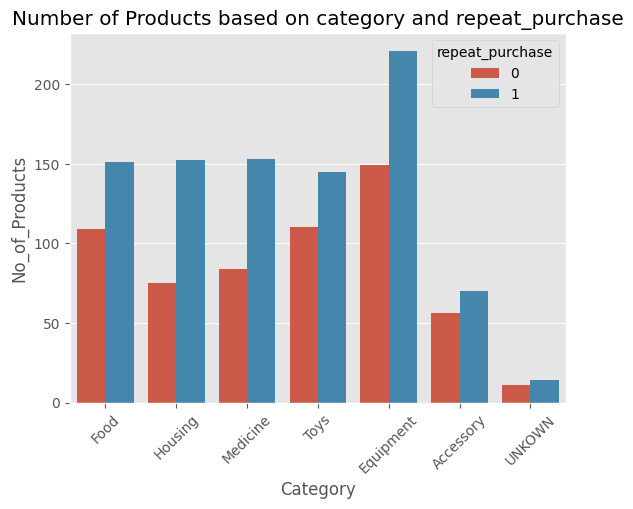

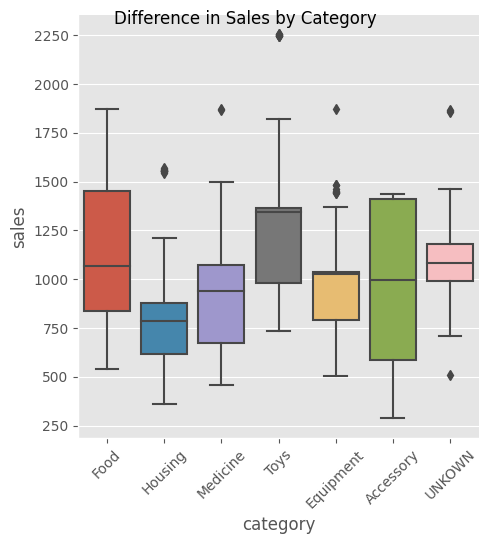

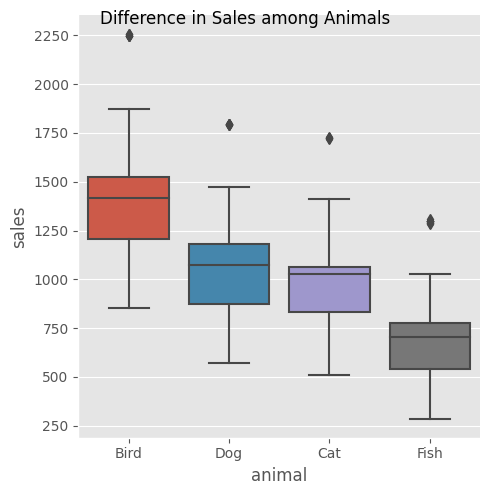

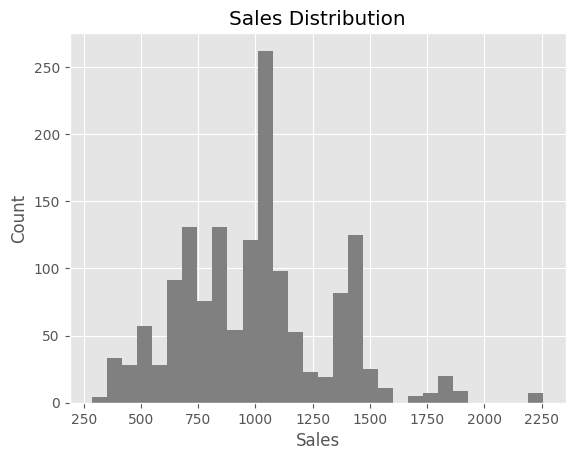

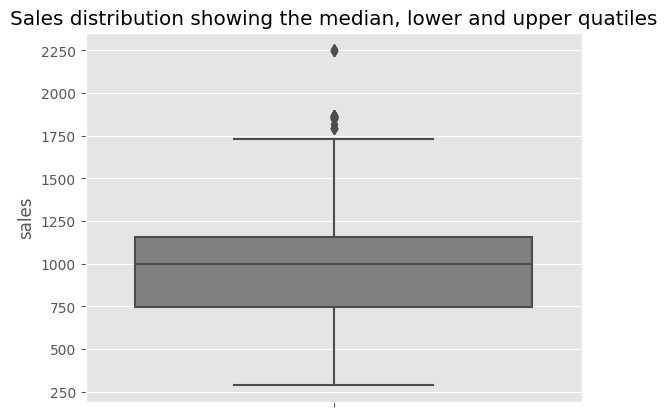

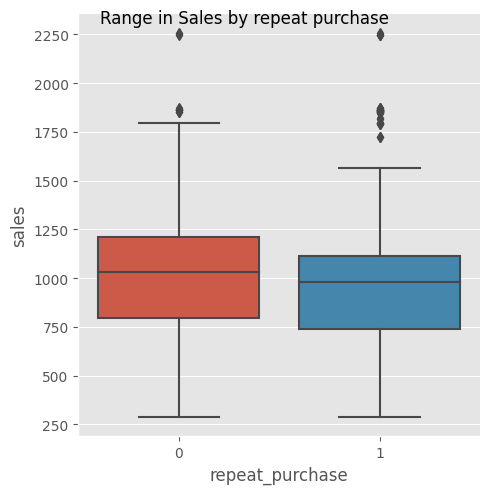

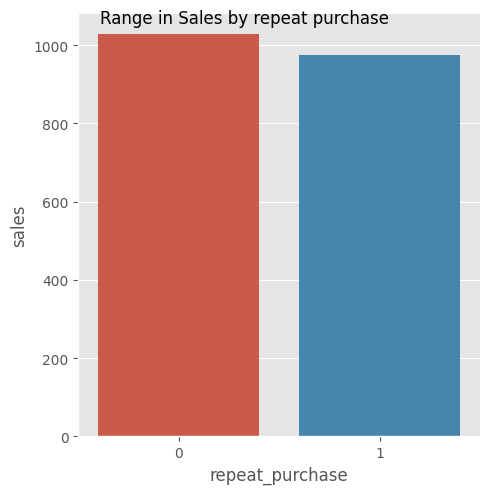

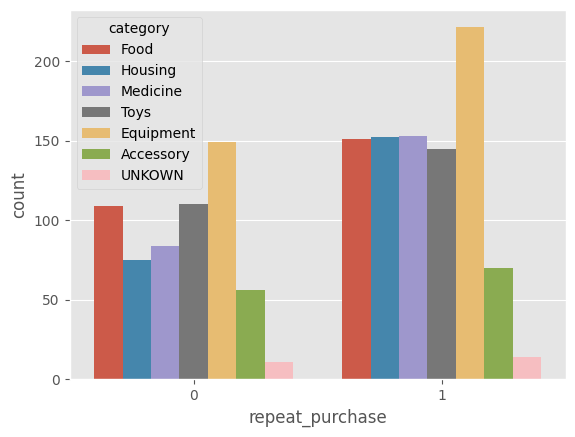

In [16]:
import pandas as pd
df=pd.read_csv('pets_new.csv')
print(df)
df.set_index('product_id')
import matplotlib.pyplot as plt
import seaborn as sns
print(df)
plt.style.use('ggplot')
g = sns.countplot(x='category',
              hue='repeat_purchase',
           data=df)
g.set_title('Number of Products based on category and repeat_purchase')
g.set(xlabel='Category', ylabel='No_of_Products')
plt.xticks(rotation=45)
plt.show()

f = sns.catplot(x='category',
           y='sales',
           data=df,
           kind='box')
f.fig.suptitle('Difference in Sales by Category')
plt.xticks(rotation=45)
plt.show()

s = sns.catplot(x='animal',
           y='sales',
           data=df,
           kind='box')
s.fig.suptitle('Difference in Sales among Animals')
plt.show()


df['size'] = df['size'].apply(str.lower)


fig, ax = plt.subplots()
plt.style.use('ggplot')

ax.hist(df['sales'], bins=30, color='gray')
ax.set_ylabel('Count')
ax.set_xlabel('Sales')
ax.set_title('Sales Distribution')
plt.show()

b = sns.boxplot(y='sales', color='gray',
           data=df)
b.set_title('Sales distribution showing the median, lower and upper quatiles')
plt.show()
df['new_price'] = df['price'].replace(0, 27.93)
r = sns.catplot(x='repeat_purchase',
               y='sales',
               data=df,
               kind='box')
r.fig.suptitle('Range in Sales by repeat purchase')

plt.show()

n = sns.catplot(x='repeat_purchase',
               y='sales',
               data=df,
               kind='bar',
               ci=None)
n.fig.suptitle('Range in Sales by repeat purchase')
plt.show()

sns.countplot(x='repeat_purchase',
            hue='category',
           data=df)
plt.show()

1. The DataFrame's column 'product_id' has no major issues and can be used as the index column since it has unique values and no missing values.

2. The 'category' column contains values that match the description and contains 25 values labeled '-' that can be associated with missing values and should be replaced with 'unknown' as this would create a new category easier for reading, grouping and analysing the data.

3. The 'animal' column has values that match the nominal description and does not contain missing value.

4. The 'size' column's values match the ordinal description and does not contain missing values, however there is a non uniformity in the case of the values which will be changed to one uniform case(lower) so that when running analysis on the data, these groups wil not be separated due to sensitivity of their case.

5.  The 'price' column of the dataset matches the values with the description but contains 150 values with the name 'unlisted' which would best be replaced with the median of the column since this will not affect calculations such as mean when running analyses on the data.

6.  For the 'sales' column, values match the continuous description and the column does not contain missing values.

7.  The 'rating' column matches the discrete description and contains 150 missing values listed as 'NA', replacing the 'NA' values with 0 using pandas in python is good practice and will not affect the rating of other products in the dataset.

8.  Finally the 'repeat_purchase' column does not contain any missing values and would best match the description with a 'Yes' for repeated purchases and 'No' for not repeated purchases. The change can be done using pandas replace method in Python and would be easier to understand when presenting analyses on the data.

NB. The data cleaning tasks of this dataset was mainly done with excel since it didn't require a lot of cleaning. 

## Category with most repreat_purchse products

![repeatpurchaseandcategory](image-6.png)

1. The Equipment category has the most observations for repeat purchases.
2. The categories all have more observations for Yes repeated purchase than for not repeating the purchase. Categories for the food, housing, medicine and toys tend to have observations towards 150 products for repeated purchase being Yes but have different values for products without repeated purchase. Overall there could be a confounding variable such as animal type or size that further affects the distribution of the data.


## Sales Distribution

![sales-distribution1](image-7.png)

The distribtion of the sales is symmetric and assumes a normal distribution due to its bell shape also being a unimodal meaning the data has a single mode or the most frequent sales amount identified by the peak of histogram which is approximately a value of sales between 1000 and 1100.
There also are outliers in sales values of 2000 and above.



![sales-boxplot](image-9.png)

Here we see that the median sales amount is approximately 1000 and we also have the upper and lower quatiles being displayed by the upper and lower edges of the boxplot respectively.

Here is some additional information of the sales distribution seen by the different categories and animals which draws a conclusion that the Toys and Food category have the leading sales with outliers in the toys sales which would explain the outliers seen in the general sales distribution.

![image-13](image-13.png)

The leading sales over animals are birds followed by dogs.

![image-14](image-14.png)


## Sales distribution by repat purchase 

![sales-repeatpurchase](image-15.png)
- From the above visualization, the median of sales without repeated purchases is slightly higher than the median of sales with repeated purchase. The maximum of the sales without repeated purchase is also higher than the maximum of the sales with repeated purchase.

**Conclusion**- In general sales of products without repeated purchase are higher than the sales of products with repeated purchases and this can further be seen in the visualization below.In addition majoring into the Equipment category is also a positive step the company can look into. 

![image-18](image-18.png)



## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam